<a href="https://colab.research.google.com/github/gangerz/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_04_DNN%EA%B8%B0%EC%B4%88_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜: 2022-07-01
* 이름: 윤예현

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [7]:
path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
dataset = pd.read_csv(path, header = None)
print(dataset.shape)
dataset

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


#### **데이터 전처리**

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_sonar(path):

  # <불러오기>
  dataset =  pd.read_csv(path, 
                       header=None, 
                       ) # 데이터 형식 : pandas의 데이터프레임
  dataset = dataset.values #데이터 형식 : 넘파이 배열로 변환
  # <x-y 분할> -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = dataset[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)


  # <정규화(속셩별로 데이터의 스케일을 조정)> # -x 데이터에만 해준다.
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <라벨링>y{R,M} -> {0,1}
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)
  

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test
  

path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2dataset_sonar(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x:{x_train[0]}')
print(f'첫번째 샘플 y:{y_train[0]}')

['M' 'R']
(145, 60) (63, 60) (145,) (63,)
첫번째 샘플 x:[-1.0273968  -0.35694414 -0.56689336  0.04756319  0.33197591  0.17010288
 -0.82977471 -0.41436351 -0.09062387 -0.16674446  0.09130188  0.15013322
  0.14289792 -0.20032031 -0.64509782 -1.02540598 -0.8104515  -0.73215157
 -0.88205229 -0.87186496 -0.87893535 -0.87741369 -0.54322719  0.05594715
  0.30112694  0.35677682  0.81588394  1.2931211   1.02943366  0.31864826
  0.48634897  0.03412697 -0.59422464 -0.99847476 -0.94299069 -1.1566019
 -0.78052411 -0.94820916 -0.43001748 -0.59813617 -0.54043534 -0.00293051
 -0.78496122 -1.09479459 -0.86492896  0.04392265  0.67148716  0.53120002
 -0.00916838 -1.17546161  0.20294926 -0.64720859 -0.73958244 -0.48616666
 -0.35221828  0.0311702  -0.71387706 -0.85974694 -0.73645375 -1.15706054]
첫번째 샘플 y:0


* 예측값 분포 확인

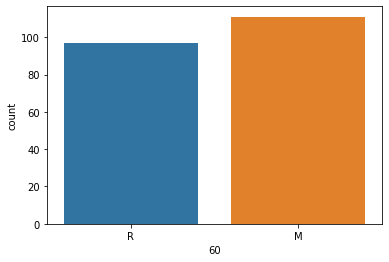

In [8]:
sns.countplot(x=dataset[60])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [26]:
from tensorflow.keras import models, layers, utils
def build_model():
   x = layers.Input(shape = (60))
   y = layers.Dense(30,activation = 'relu')(x) 
   y = layers.Dense(1, activation = 'sigmoid')(y) #이진분류 문제의 경우, 마지막 레이어에서 sigmoid 사용
   model = models.Model(x, y)
   return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [27]:
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 이진분류에서는 'binary_crossentropy'
* `optimizer` : 'adam' (no problem)
* `metrics`
  * 추가적인 옵션
  * 딥러닝 알고리즘에 필수 요소는 아닌다.
  * 사용자 편의 (정확도)


In [28]:
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [29]:
model.fit(x_train, y_train, epochs =30, batch_size = 10)

Epoch 1/30
15/15 [==============================] - 0s 3ms/step - loss: 0.7699 - accuracy: 0.4759
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.6207
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6690
Epoch 4/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7241
Epoch 5/30
15/15 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7793
Epoch 6/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8138
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8276
Epoch 8/30
15/15 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8552
Epoch 9/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8828
Epoch 10/30
15/15 [==============================] - 0s 3ms/step - loss: 0.3712 - accuracy: 0.9034
Epoch 11/30
15/15 [

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [30]:
model.evaluate(x_test,y_test) #r과적합

2/2 [==============================] - 0s 6ms/step - loss: 0.3707 - accuracy: 0.7937


[0.3706716001033783, 0.7936508059501648]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [35]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) 
for i in range(50):
  print('y true:', y_test[i], 'y pred:', y_pred[i])
y_test.shape, y_pred.shape

y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 0 y pred: 1.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 1.0
y true: 0 y pred: 1.0
y true: 1 

((63,), (63,))

* 예측 시각화

[[28  5]
 [ 8 22]]


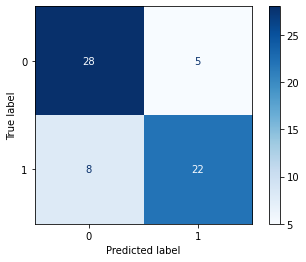

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap= 'Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 또는 1
* 예측값의 shape : (샘플수, 1) 혹은 (샘플수,)
* 아웃풋 레이어의 노드 개수 : 1 개
* 아웃풋 레이어의 activation : sigmoid
* 손실함수 (loss) : binary_crossentroty
* 평가함수 (metrics) : accuracy(정확도)

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

['M' 'R']
(145, 60) (63, 60) (145,) (63,)
첫번째 샘플 x:[-1.20615835 -0.60328999 -0.38951266 -0.74095829 -0.42769865 -0.38787239
 -0.34469365 -1.44088297 -0.5182194  -0.45236879 -0.18289791  0.05209041
 -0.26955286 -0.99445209 -1.51758067 -0.79015248 -0.18051523  0.04707449
  0.1437185   0.24026107  0.5168784   0.78907491  0.85716302  0.70153924
  0.89825313  1.24498292  1.2153686   1.14478085  0.97060315  0.20330806
 -1.34007377 -0.67947475 -0.2559012   0.42467788  1.51534195  2.09215621
  1.90399769  1.32279875  0.63194033 -0.0606331  -0.12801415 -0.32196152
  0.4872258   1.16736727  0.67014029  0.46378392 -0.43291895 -0.89171619
 -0.64205439 -0.60328372 -0.96570457 -0.27262999 -0.45562647 -0.28021418
 -0.80479837 -0.92998098 -1.12970836 -1.07665762 -0.76888703 -0.3600787 ]
첫번째 샘플 y:0
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0  

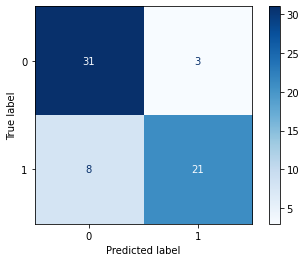

In [49]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def path2dataset_sonar(path):

  # <불러오기>
  dataset =  pd.read_csv(path, 
                       header=None, 
                       ) # 데이터 형식 : pandas의 데이터프레임
  dataset = dataset.values #데이터 형식 : 넘파이 배열로 변환
  # <x-y 분할> -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = dataset[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)


  # <정규화(속셩별로 데이터의 스케일을 조정)> # -x 데이터에만 해준다.
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <라벨링>y{R,M} -> {0,1}
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)
  

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test
  
def build_model():
   x = layers.Input(shape = (60))
   y = layers.Dense(80,activation = 'relu')(x) 
   y = layers.Dense(40, activation = 'relu')(y)
   y = layers.Dense(1, activation = 'sigmoid')(y) #이진분류 문제의 경우, 마지막 레이어에서 sigmoid 사용
   model = models.Model(x, y)
   return model

path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2dataset_sonar(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x:{x_train[0]}')
print(f'첫번째 샘플 y:{y_train[0]}')

model = build_model()
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs =30, batch_size = 10)

y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) 
for i in range(50):
  print('y true:', y_test[i], 'y pred:', y_pred[i])
y_test.shape, y_pred.shape

cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap= 'Blues')

### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

In [55]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def path2dataset_sonar(path):

  # <불러오기>
  df =  pd.read_csv(path, 
                       header=None, 
                       ) # 데이터 형식 : pandas의 데이터프레임
  df = df.values #데이터 형식 : 넘파이 배열로 변환
  # <x-y 분할> -> 넘파이 배열을 슬라이싱하는 기법
  x = df[:, 0:-1]  # ( : 모든행,첫번째 부터 마지막 전까지) * a:b -> a~b까지
  y = df[:, -1]    # 마지막꺼
  #print(x.shape, y.shape)


  # <정규화(속셩별로 데이터의 스케일을 조정)> # -x 데이터에만 해준다.
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터 형식 : 넘파이 배열
  
  # <라벨링>y{R,M} -> {0,1}
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)
  print(labeling.classes_)
  

  # <**train-test 분할**>
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
  return x_train, x_test, y_train, y_test
  
def build_model():
   x = layers.Input(shape = (8))
   y = layers.Dense(20,activation = 'relu')(x) 
   y = layers.Dense(1, activation = 'sigmoid')(y) #이진분류 문제의 경우, 마지막 레이어에서 sigmoid 사용
   model = models.Model(x, y)
   return model

path = '/content/SkillTreePython-DeepLearning/dataset/pima-indians-diabetes.csv'
x_train, x_test, y_train, y_test = path2dataset_sonar(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x:{x_train[0]}')
print(f'첫번째 샘플 y:{y_train[0]}')

model = build_model()
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

[0. 1.]
(537, 8) (231, 8) (537,) (231,)
첫번째 샘플 x:[ 1.53084665  1.97502103  0.8217115  -0.3472913  -0.69289057 -0.25289651
  2.23828152  1.34090765]
첫번째 샘플 y:1
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_13 (Dense)            (None, 20)                180       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(x_train, y_train, epochs =30, batch_size = 10)


Epoch 1/30
54/54 [==============================] - 1s 5ms/step - loss: 0.6093 - accuracy: 0.7169
Epoch 2/30
54/54 [==============================] - 0s 5ms/step - loss: 0.5374 - accuracy: 0.7635
Epoch 3/30
54/54 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7765
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7728
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7765
Epoch 6/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7877
Epoch 7/30
54/54 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7896
Epoch 8/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7914
Epoch 9/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7933
Epoch 10/30
54/54 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7914
Epoch 11/30
54/54 [

In [57]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.round(y_pred) 
for i in range(50):
  print('y true:', y_test[i], 'y pred:', y_pred[i])
y_test.shape, y_pred.shape

y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 1.0
y true: 0 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 1 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 1 y pred: 1.0
y true: 0 y pred: 0.0
y true: 0 y pred: 0.0
y true: 0 y pred: 1.0
y true: 1 

((231,), (231,))

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 


1. 샘플링 데이터를 늘린다.
2. 원하는 데이터의 loss에 특정 값을 곱하여 학습을 진행한다.